In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from holoviews.util.transform import xr_dim

sns.set_theme()

In [2]:
daily_us_mkt = pd.read_csv('F-F_Research_Data_Factors_daily-3.CSV',index_col=0, nrows=25543, skiprows=4)

In [3]:
daily_us_mkt['Return'] = daily_us_mkt['Mkt-RF'] - daily_us_mkt['RF']


In [4]:
daily_us_mkt['Return'].head()

19260701    0.091
19260702    0.441
19260706    0.161
19260707    0.081
19260708    0.201
Name: Return, dtype: float64

In [5]:
daily_us_mkt.index = pd.to_datetime(daily_us_mkt.index,format="%Y%m%d")

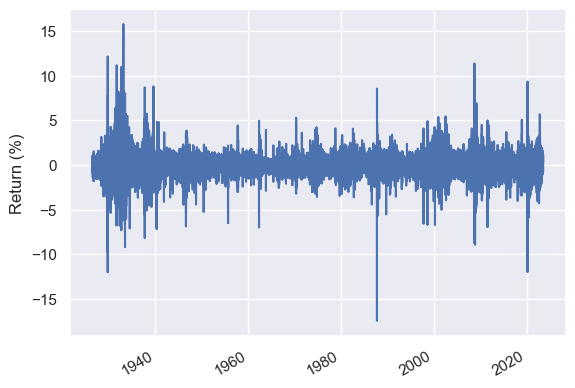

In [28]:
us_Daily = daily_us_mkt['Return'].plot(ylabel='Return (%)')

In [29]:
us_Daily.figure.savefig('us_daily.png')

In [8]:
prices = pd.read_hdf('prices.h5', 'prices')

In [9]:
ACt = prices[['Symbol','Adj Close']].set_index(['Symbol'],append=True).unstack()

In [10]:
ACt

Adj Close                                                 \
Symbol            ABBV         ACN        AEP         AIZ        ALLE   
2012-02-17         NaN   47.216660  26.371130   34.998379         NaN   
2012-02-20         NaN         NaN        NaN         NaN         NaN   
2012-02-21         NaN   46.982315  26.464043   35.284538         NaN   
2012-02-22         NaN   47.297482  26.444134   34.624798         NaN   
2012-02-23         NaN   48.008587  25.163086   34.393326         NaN   
...                ...         ...        ...         ...         ...   
2023-02-10  150.663986  282.849274  89.734322  132.681610  117.578629   
2023-02-13  152.328674  287.222107  90.269455  132.840744  119.410812   
2023-02-14  151.199066  283.656097  89.664955  129.538864  119.351067   
2023-02-15  149.683014  286.524841  90.100983  131.229584  121.063766   
2023-02-16  148.166962  280.119995  89.882965  132.214172  118.245781   

                                                                        ...  \
Symbol            AMAT         AMP        AMZN         AVB         AVY  ...   
2012-02-17   10.759753   43.406635    9.125000   93.244644   23.652424  ...   
2012-02-20         NaN         NaN         NaN         NaN         NaN  ...   
2012-02-21   10.593065   43.137928    9.113000   91.053200   23.722824  ...   
2012-02-22   10.751418   42.869232    9.029000   90.350533   23.746281  ...   
2012-02-23   10.618070   43.375919    8.944500   90.482727   24.129541  ...   
...                ...         ...         ...         ...         ...  ...   
2023-02-10  114.501846  348.055878   97.610001  178.446075  180.641983  ...   
2023-02-13  116.257736  353.629059   99.540001  179.346832  184.525894  ...   
2023-02-14  118.163277  351.051453   99.699997  178.248123  183.480240  ...   
2023-02-15  119.180885  348.623138  101.160004  179.297333  184.864502  ...   
2023-02-16  115.120399  347.797119   98.150002  178.287704  181.299271  ...   

                                                                     \
Symbol            XLC        XLE        XLF         XLI         XLK   
2012-02-17        NaN  50.068344   9.705557   29.981085   24.172039   
2012-02-20        NaN        NaN        NaN         NaN         NaN   
2012-02-21        NaN  50.409393   9.698998   30.085625   24.273745   
2012-02-22        NaN  50.523087   9.574314   30.053463   24.188993   
2012-02-23        NaN  50.777218   9.659619   30.149973   24.282221   
...               ...        ...        ...         ...         ...   
2023-02-10  54.810135  89.278244  36.309792  101.722649  140.070786   
2023-02-13  55.588009  89.050629  36.727715  102.648849  142.495438   
2023-02-14  55.607952  89.080315  36.528702  102.369995  143.104095   
2023-02-15  56.116566  87.566116  36.568504  103.007378  143.772614   
2023-02-16  55.258907  86.705101  36.200333  101.941750  141.278122   

                                                                      
Symbol            XLP        XLU         XLV         XLY         XOM  
2012-02-17  24.538895  23.864927   30.059881   37.236385   54.083855  
2012-02-20        NaN        NaN         NaN         NaN         NaN  
2012-02-21  24.397871  23.776415   29.844231   37.106377   54.683937  
2012-02-22  24.331060  23.803650   29.844231   37.011036   54.905025  
2012-02-23  24.457245  23.783222   29.869112   37.193054   54.968182  
...               ...        ...         ...         ...         ...  
2023-02-10  72.620888  67.214584  131.975250  147.699280  117.242645  
2023-02-13  73.446915  67.621590  133.070969  149.862686  116.786598  
2023-02-14  72.780121  67.333710  132.284042  151.657196  115.418465  
2023-02-15  72.919449  67.770485  131.626602  153.431793  115.071480  
2023-02-16  72.391983  67.254295  130.311737  150.082016  114.734406  

[2868 rows x 100 columns]

In [37]:
daily_rtn = np.log(ACt.astype(np.float64)).diff()
daily_rtn.columns = daily_rtn.columns.droplevel(0)
daily_rtn

Symbol,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
2012-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-22,NaN,0.006686,-0.000753,-0.018875,NaN,0.014838,-0.006248,-0.009260,-0.007747,0.000988,...,NaN,0.002253,-0.012939,-0.001070,-0.003498,-0.002742,0.001145,0.000000,-0.002573,0.004035
2012-02-23,NaN,0.014923,-0.049656,-0.006708,NaN,-0.012480,0.011750,-0.009403,0.001462,0.016011,...,NaN,0.005017,0.008870,0.003206,0.003847,0.005173,-0.000859,0.000833,0.004906,0.001150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-10,0.022279,-0.004217,0.023126,0.009565,-0.004225,-0.011349,0.004241,-0.006433,-0.000499,0.002650,...,-0.009597,0.038418,0.003294,0.007074,-0.004620,0.009224,0.019687,0.009403,-0.011810,0.041287
2023-02-13,0.010988,0.015342,0.005946,0.001199,0.015462,0.015219,0.015885,0.019580,0.005035,0.021273,...,0.014092,-0.002553,0.011444,0.009064,0.017162,0.011310,0.006037,0.008268,0.014541,-0.003897
2023-02-14,-0.007443,-0.012493,-0.006719,-0.025170,-0.000500,0.016258,-0.007316,0.001606,-0.006145,-0.005683,...,0.000359,0.000333,-0.005433,-0.002720,0.004262,-0.009120,-0.004266,-0.005931,0.011903,-0.011784
2023-02-15,-0.010077,0.010063,0.004851,0.012967,0.014248,0.008575,-0.006941,0.014538,0.005869,0.007516,...,0.009105,-0.017144,0.001089,0.006207,0.004661,0.001913,0.006466,-0.004982,0.011633,-0.003011


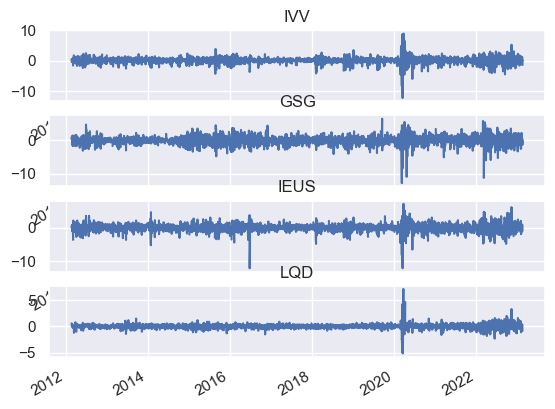

In [41]:
fig, axes = plt.subplots(nrows=4)
assets = ['IVV','GSG','IEUS','LQD']
for i in range(4):
    (daily_rtn[assets[i]]*100).round(1).plot(ax=axes[i])
    axes[i].set_title(assets[i])
    


<Figure size 640x480 with 0 Axes>

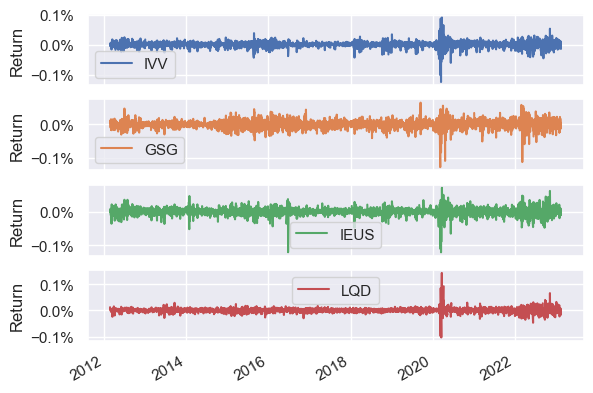

In [50]:
plt.figure()
ax=daily_rtn[assets].plot(subplots=True,ylabel='Return')
[x.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1)) for x in ax]
plt.savefig('etfs_daily.png')

In [46]:
ax

array([<Axes: ylabel='Return'>, <Axes: ylabel='Return'>,
       <Axes: ylabel='Return'>, <Axes: ylabel='Return'>], dtype=object)

In [16]:
daily_rtn

Symbol,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
2012-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-22,NaN,0.006686,-0.000753,-0.018875,NaN,0.014838,-0.006248,-0.009260,-0.007747,0.000988,...,NaN,0.002253,-0.012939,-0.001070,-0.003498,-0.002742,0.001145,0.000000,-0.002573,0.004035
2012-02-23,NaN,0.014923,-0.049656,-0.006708,NaN,-0.012480,0.011750,-0.009403,0.001462,0.016011,...,NaN,0.005017,0.008870,0.003206,0.003847,0.005173,-0.000859,0.000833,0.004906,0.001150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-10,0.022279,-0.004217,0.023126,0.009565,-0.004225,-0.011349,0.004241,-0.006433,-0.000499,0.002650,...,-0.009597,0.038418,0.003294,0.007074,-0.004620,0.009224,0.019687,0.009403,-0.011810,0.041287
2023-02-13,0.010988,0.015342,0.005946,0.001199,0.015462,0.015219,0.015885,0.019580,0.005035,0.021273,...,0.014092,-0.002553,0.011444,0.009064,0.017162,0.011310,0.006037,0.008268,0.014541,-0.003897
2023-02-14,-0.007443,-0.012493,-0.006719,-0.025170,-0.000500,0.016258,-0.007316,0.001606,-0.006145,-0.005683,...,0.000359,0.000333,-0.005433,-0.002720,0.004262,-0.009120,-0.004266,-0.005931,0.011903,-0.011784
2023-02-15,-0.010077,0.010063,0.004851,0.012967,0.014248,0.008575,-0.006941,0.014538,0.005869,0.007516,...,0.009105,-0.017144,0.001089,0.006207,0.004661,0.001913,0.006466,-0.004982,0.011633,-0.003011


In [17]:
rs_spec=4*pd.offsets.Week(weekday=4)
full_period_est = pd.bdate_range(start=daily_rtn.index.min(),end=daily_rtn.index.max(),freq=rs_spec)


In [18]:
rtns = daily_rtn.resample(rs_spec).mean()
rtns2 = daily_rtn.resample(rs_spec).std()


In [19]:
res=pd.DataFrame(index=daily_rtn.columns,columns=['Mean','Standard Deviation'])
for i in daily_rtn.columns:
    rtn_i = rtns[i].dropna().values
    res.loc[i,'Mean'] = ((rtn_i[1:]*rtn_i[:-1]).sum()/(rtn_i**2).sum())
    rtn2_i = rtns2[i].dropna().values
    res.loc[i,'Standard Deviation'] = ((rtn2_i[1:]*rtn2_i[:-1]).sum()/(rtn2_i**2).sum())

res

,Mean,Standard Deviation
Symbol,,
ABBV,-0.00669,0.850032
ACN,-0.008641,0.867724
AEP,-0.134403,0.895109
AIZ,0.058086,0.83623
ALLE,-0.116562,0.884959
...,...,...
XLP,0.00054,0.85668
XLU,-0.160134,0.866966
XLV,-0.025015,0.88175


In [20]:
res_Stack = res.stack().reset_index(level=1,drop=False).set_axis(['Statistic','AR1 Coefficient'],axis=1)
res_Stack

,Statistic,AR1 Coefficient
Symbol,,
ABBV,Mean,-0.00669
ABBV,Standard Deviation,0.850032
ACN,Mean,-0.008641
ACN,Standard Deviation,0.867724
AEP,Mean,-0.134403
...,...,...
XLV,Standard Deviation,0.88175
XLY,Mean,-0.035246
XLY,Standard Deviation,0.894727


<Figure size 640x480 with 0 Axes>

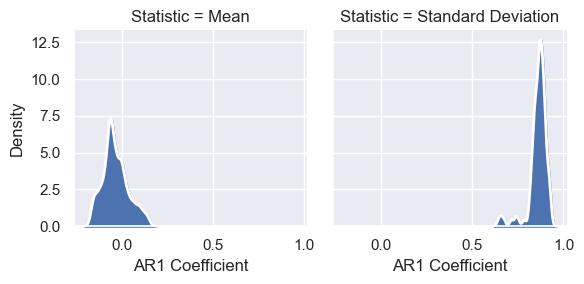

In [21]:
plt.figure()
g = sns.FacetGrid(res_Stack, col="Statistic")
g.map(sns.kdeplot, 'AR1 Coefficient',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'AR1 Coefficient', clip_on=False, color="w", lw=2, bw_adjust=.5)
plt.savefig('AR1_Coef.png')
